COCO JSON fait référence à un format de fichier de données utilisé dans le domaine de la vision par ordinateur, en particulier pour les tâches de détection d'objets et de segmentation sémantique.  

COCO (Common Objects in Context) est une base de données standard utilisée pour l'évaluation des algorithmes de vision par ordinateur, contenant des images annotées avec des informations telles que les emplacements et les catégories des objets présents dans ces images.  

Le format COCO JSON est utilisé pour stocker ces annotations de manière structurée. Il s'agit d'un format de fichier JSON (JavaScript Object Notation), qui est un format léger et largement utilisé pour le stockage et l'échange de données.  

Dans le contexte de COCO, ce format JSON spécifique contient des informations sur les images, les catégories d'objets présentes dans les images et les annotations associées à ces objets, telles que les boîtes englobantes (bounding boxes) et les masques de segmentation.

### How to visualize COCO annotations on images?

In [2]:
import os
import random
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [3]:
def display_images_with_coco_annotations(image_paths, annotations, display_type='both', colors=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    
    for ax, img_path in zip(axs.ravel(), image_paths):
        # Load image using OpenCV and convert it from BGR to RGB color space
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax.imshow(image)
        ax.axis('off')  # Turn off the axes

        # Define a default color map if none is provided
        if colors is None:
            colors = plt.cm.get_cmap('tab10')

        # Get image filename to match with annotations
        img_filename = os.path.basename(img_path)
        img_id = next(item for item in annotations['images'] if item["file_name"] == img_filename)['id']
        
        # Filter annotations for the current image
        img_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == img_id]
        
        for ann in img_annotations:
            category_id = ann['category_id']
            color = colors(category_id % 10)
            
            # Display bounding box
            if display_type in ['bbox', 'both']:
                bbox = ann['bbox']
                rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=color, facecolor='none')
                ax.add_patch(rect)
            
            # Display segmentation polygon
            if display_type in ['seg', 'both']:
                for seg in ann['segmentation']:
                    poly = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                    polygon = patches.Polygon(poly, closed=True, edgecolor=color, fill=False)
                    ax.add_patch(polygon)

    plt.tight_layout()
    plt.show()

In [4]:
with open('../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_polygons.json', 'r') as f:
    annotations = json.load(f)

In [6]:
image_dir = "../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/"
#all_image_files = [os.path.join(image_dir, img['file_name']) for img in annotations['images']]
#random_image_files = random.sample(all_image_files, 4)
random_image_files = '../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png'

error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


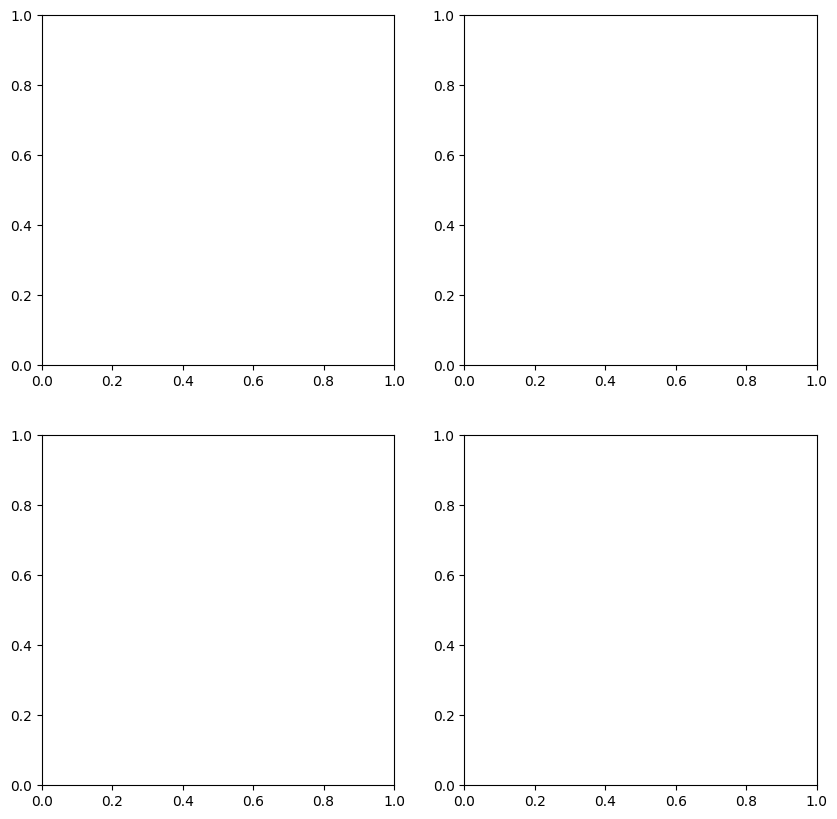

In [7]:
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, annotations, display_type)

In [8]:
with open('../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_polygons.json', 'r') as f:
    annotations = json.load(f)

In [37]:
color_tab = []
for ob in annotations['objects']:
    color_tab.append(ob['label'])


In [39]:
color_tab = set(color_tab)
colors_tab = list(color_tab)
colors_tab

['ego vehicle',
 'car',
 'bicycle',
 'traffic sign',
 'static',
 'out of roi',
 'building',
 'sky',
 'road',
 'rider',
 'person',
 'license plate',
 'vegetation',
 'pole',
 'sidewalk',
 'terrain']

In [60]:
color_dict_rgb = {
    'ego vehicle': (31, 119, 181),
    'car': (255, 127, 14),
    'bicycle': (44, 160, 44),
    'traffic sign': (214, 39, 40),
    'static': (148, 103, 189),
    'out of roi': (140, 86, 75),
    'building': (227, 119, 194),
    'sky': (127, 127, 127),
    'road': (188, 189, 34),
    'rider': (23, 190, 207),
    'person': (31, 119, 181),
    'license plate': (174, 199, 232),
    'vegetation': (230, 158, 0),
    'pole': (166, 86, 40),
    'sidewalk': (102, 102, 102),
    'terrain': (0, 255, 0)
}

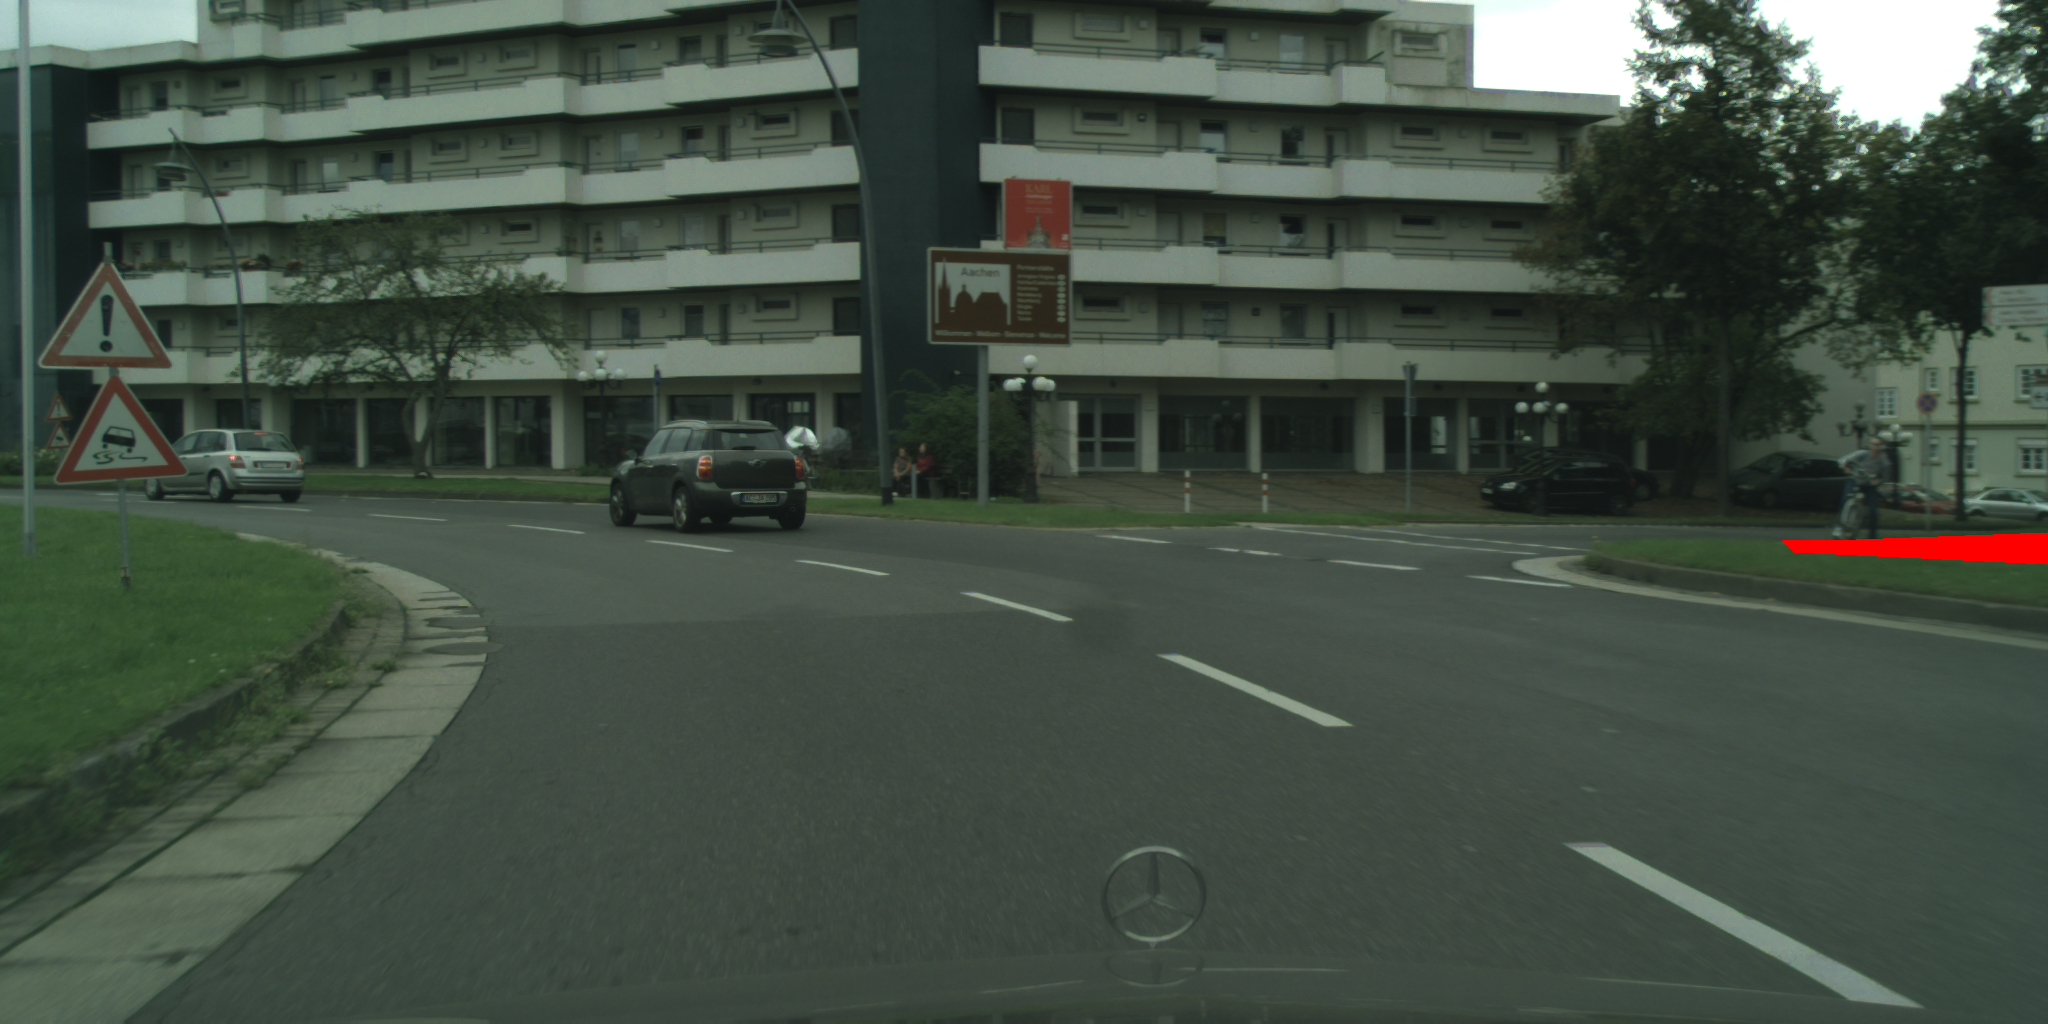

In [69]:
from PIL import Image, ImageDraw

image = Image.open("../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png")

# nouvel objet ImageDraw pour dessiner sur l'image
draw = ImageDraw.Draw(image)

polygon_coordinates = [
    (2047, 532),
    (1911, 537),
    (1828, 540),
    (1782, 540),
    (1794, 552),
    (2047, 564)
]

draw.polygon(polygon_coordinates, fill=255)
image


In [62]:
polygon_coordinates = []

for ob in annotations['objects']:
    print(ob)

{'label': 'road', 'polygon': [[0, 769], [290, 574], [93, 528], [0, 524], [0, 448], [0, 448], [210, 453], [511, 451], [782, 459], [892, 495], [943, 498], [1044, 471], [1490, 486], [1880, 519], [1922, 512], [1975, 522], [2047, 524], [2047, 570], [1668, 553], [2047, 597], [2047, 1023], [892, 1023], [0, 1023]]}
{'label': 'sidewalk', 'polygon': [[2047, 532], [1911, 537], [1828, 540], [1782, 540], [1794, 552], [2047, 564]]}
{'label': 'car', 'polygon': [[806, 503], [803, 524], [796, 528], [785, 528], [778, 527], [776, 520], [771, 520], [768, 515], [732, 515], [728, 523], [722, 523], [715, 524], [714, 523], [711, 520], [709, 517], [706, 517], [702, 520], [697, 529], [690, 532], [681, 532], [678, 529], [674, 527], [671, 517], [635, 514], [632, 525], [615, 526], [611, 521], [609, 483], [620, 464], [629, 459], [625, 453], [629, 450], [634, 450], [639, 455], [644, 456], [644, 453], [643, 450], [658, 429], [672, 422], [674, 420], [766, 420], [780, 430], [789, 447], [793, 453], [800, 456], [804, 470

In [67]:
annotations['objects'][0]['polygon']

[[0, 769],
 [290, 574],
 [93, 528],
 [0, 524],
 [0, 448],
 [0, 448],
 [210, 453],
 [511, 451],
 [782, 459],
 [892, 495],
 [943, 498],
 [1044, 471],
 [1490, 486],
 [1880, 519],
 [1922, 512],
 [1975, 522],
 [2047, 524],
 [2047, 570],
 [1668, 553],
 [2047, 597],
 [2047, 1023],
 [892, 1023],
 [0, 1023]]

In [76]:
polygon_annotation = []
for x, y in annotations['objects'][0]['polygon']:
    polygon_annotation.append((x, y))

In [77]:
polygon_annotation

[(0, 769),
 (290, 574),
 (93, 528),
 (0, 524),
 (0, 448),
 (0, 448),
 (210, 453),
 (511, 451),
 (782, 459),
 (892, 495),
 (943, 498),
 (1044, 471),
 (1490, 486),
 (1880, 519),
 (1922, 512),
 (1975, 522),
 (2047, 524),
 (2047, 570),
 (1668, 553),
 (2047, 597),
 (2047, 1023),
 (892, 1023),
 (0, 1023)]

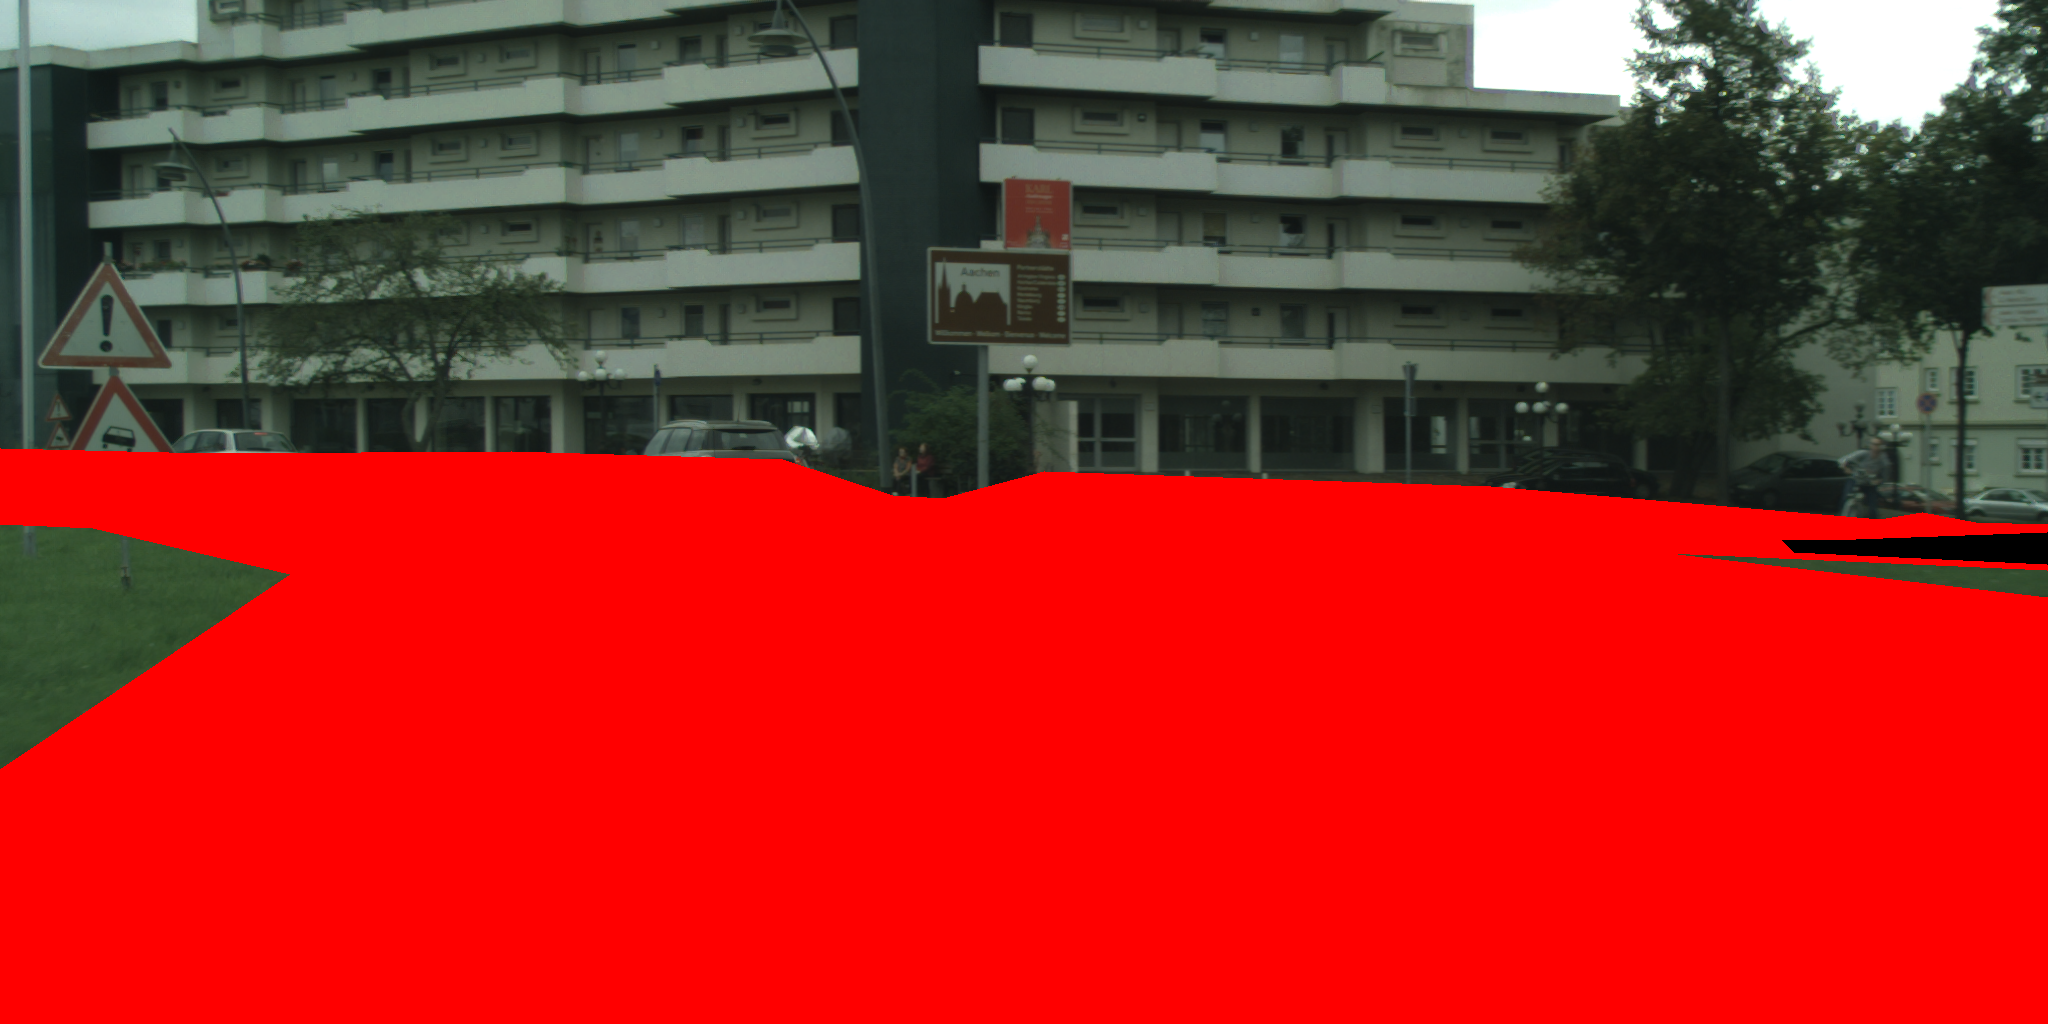

In [78]:
from PIL import Image, ImageDraw

image = Image.open("../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png")

draw = ImageDraw.Draw(image)

draw.polygon(polygon_annotation, fill=255)
draw.polygon(polygon_coordinates, fill=0)
image